In [187]:
 
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
import string

In [45]:

spam_data = pd.read_csv('Spam_Dataset.csv')

In [46]:

spam_data.head()

,Category,Message
0,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,1,FreeMsg Hey there darling it's been 3 week's n...
2,1,WINNER!! As a valued network customer you have...
3,1,Had your mobile 11 months or more? U R entitle...
4,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [47]:
# check datatype and count
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1637 non-null   int64 
 1   Message   1637 non-null   object
dtypes: int64(1), object(1)
memory usage: 25.7+ KB


In [48]:
spam_data['Category'].value_counts()

0    996
1    641
Name: Category, dtype: int64

In [49]:

spam_data.isna().sum()

Category    0
Message     0
dtype: int64

In [50]:
spam_data.dropna(inplace=True)

In [51]:
spam_data['Message'] = spam_data['Message'].astype('string')
spam_data.dtypes

Category     int64
Message     string
dtype: object

In [52]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1636
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1637 non-null   int64 
 1   Message   1637 non-null   string
dtypes: int64(1), string(1)
memory usage: 38.4 KB


In [53]:

x_4_eda = spam_data['Message'].tolist()

In [54]:

x = spam_data['Message']
x_low = [email.lower() for email in x]
x_low[10]

'sms. ac sptv: the new jersey devils and the detroit red wings play ice hockey. correct or incorrect? end? reply end sptv'

In [55]:

x_link_cl = [re.sub(r"http\s.\s.\s.\s\S+\s.\s\S+\s.\s\S+", "", text) for text in x_low]
x_link_cl[10]

'sms. ac sptv: the new jersey devils and the detroit red wings play ice hockey. correct or incorrect? end? reply end sptv'

In [56]:

x_link_cl[0]
x_digts_cl = [re.sub("[^a-zA-Z0-9]"," ",text) for text in x_link_cl]
x_digts_cl[0]


'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005  text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s'

In [57]:

x_nm_cl = list(map(lambda words: ' '.join(s for s in words.split() if not any(c.isdigit() for c in s)), x_digts_cl))
x_nm_cl[0]

'free entry in a wkly comp to win fa cup final tkts may text fa to to receive entry question std txt rate t c s apply s'

In [58]:

x_final_cl = list(map(lambda words: ' '.join(s for s in words.split() if len(s) > 1), x_nm_cl))
x_final_cl[0]

'free entry in wkly comp to win fa cup final tkts may text fa to to receive entry question std txt rate apply'

In [59]:
spam_data['Message'] = x_final_cl
spam_data['Message'] = spam_data['Message'].astype('string')
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1636
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1637 non-null   int64 
 1   Message   1637 non-null   string
dtypes: int64(1), string(1)
memory usage: 38.4 KB


In [60]:
spam_data['punct_count'] = [len(re.findall("[!#$%&\'()+,-./:;<=>?@[\\]^_`{|}~]",text)) for text in x_link_cl]

In [61]:
def count_capital(words):
    return (len(list(filter(lambda x:x.isupper(), list(words)))))

In [62]:
spam_data['cl_count'] = list(map(count_capital, x_4_eda))

In [63]:
def count_nums(words):
    return (len(list(filter(lambda x:x.isdigit(), list(words)))))

In [64]:
spam_data['nums_count'] = list(map(count_nums, x_digts_cl))

In [65]:
import nltk
#nltk.download('stopwords')

In [66]:
stopwords = nltk.corpus.stopwords.words("english")

In [67]:
def count_stopw(words):
    return (len(list(filter(lambda x:x in stopwords, list(words)))))

In [68]:
spam_data['st_word_count'] = list(map(count_stopw, x_final_cl))

In [69]:
spam_data['length'] = list(map(len, spam_data['Message']))

In [70]:
spam_data.head(5)

,Category,Message,punct_count,cl_count,nums_count,st_word_count,length
0,1,free entry in wkly comp to win fa cup final tk...,6,10,25,41,108
1,1,freemsg hey there darling it been week now and...,8,7,4,40,127
2,1,winner as valued network customer you have bee...,6,12,19,42,123
3,1,had your mobile months or more entitled to upd...,2,14,13,52,133
4,1,six chances to win cash from to pounds txt and...,8,17,22,40,91


In [71]:
spam_data.groupby("Category").describe()

punct_count                                               cl_count  \
               count      mean       std  min  25%  50%  75%   max    count   
Category                                                                      
0              996.0  3.629518  3.465304  0.0  1.0  3.0  5.0  30.0    996.0   
1              641.0  5.425897  3.200276  0.0  3.0  5.0  8.0  18.0    641.0   

                     ... st_word_count        length                         \
               mean  ...           75%    max  count        mean        std   
Category             ...                                                      
0          3.788153  ...          33.0  289.0  996.0   65.428715  53.773132   
1         15.132605  ...          46.0   71.0  641.0  105.586583  26.976073   

                                          
          min   25%    50%    75%    max  
Category                                  
0         2.0  30.0   49.0   87.0  879.0  
1         0.0  92.0  110.0  124.0  182.0  

[2 rows x 40 columns]

In [72]:
spam_data["Message"].describe()

count                                                  1637
unique                                                 1569
top       private your account statement for shows un re...
freq                                                     10
Name: Message, dtype: object

In [73]:
spam_data[spam_data["Message"].duplicated()]

,Category,Message,punct_count,cl_count,nums_count,st_word_count,length
83,1,private your account statement for shows un re...,9,17,40,35,88
90,1,private your account statement for shows un re...,9,17,29,35,88
133,1,have secret admirer who is looking make contac...,2,5,12,40,110
155,1,urgent we are trying to contact todays draw sh...,5,23,18,45,115
175,1,you have new voicemail please call,2,2,12,11,34
...,...,...,...,...,...,...,...
610,1,had your mobile update for free to oranges lat...,3,12,15,44,122
614,1,urgent your mobile number has been awarded wit...,4,21,24,34,101
634,1,private your account statement for shows un re...,9,17,40,35,88
635,1,private your account statement for shows un re...,9,17,29,35,88


In [74]:
spam_data = spam_data.drop_duplicates(subset = ['Message'])

In [75]:
spam_data.groupby("Category").describe()

punct_count                                               cl_count  \
               count      mean       std  min  25%  50%  75%   max    count   
Category                                                                      
0              996.0  3.629518  3.465304  0.0  1.0  3.0  5.0  30.0    996.0   
1              573.0  5.467714  3.233525  0.0  3.0  5.0  8.0  18.0    573.0   

                     ... st_word_count        length                         \
               mean  ...           75%    max  count        mean        std   
Category             ...                                                      
0          3.788153  ...          33.0  289.0  996.0   65.428715  53.773132   
1         15.120419  ...          46.0   71.0  573.0  106.080279  27.097671   

                                          
          min   25%    50%    75%    max  
Category                                  
0         2.0  30.0   49.0   87.0  879.0  
1         0.0  93.0  111.0  124.0  182.0  

[2 rows x 40 columns]

In [76]:
spam_data["Message"].describe()

count     1569
unique    1569
top           
freq         1
Name: Message, dtype: object

In [77]:
features = list(
    set(spam_data.columns)
    - {
        "Category",
        "Message",
    })
spam_data[features] = spam_data[features].apply(np.log1p)

In [78]:
spam_data.groupby("Category").describe()

punct_count                                                         \
               count      mean       std  min       25%       50%       75%   
Category                                                                      
0              996.0  1.300253  0.684935  0.0  0.693147  1.386294  1.791759   
1              573.0  1.720023  0.585687  0.0  1.386294  1.791759  2.197225   

                   cl_count            ... st_word_count           length  \
               max    count      mean  ...           75%       max  count   
Category                               ...                                  
0         3.433987    996.0  1.175051  ...      3.526361  5.669881  996.0   
1         2.944439    573.0  2.509510  ...      3.850148  4.276666  573.0   

                                                                                
              mean       std       min       25%       50%       75%       max  
Category                                                                        
0         3.951613  0.704368  1.098612  3.433987  3.912023  4.477337  6.779922  
1         4.619678  0.406322  0.000000  4.543295  4.718499  4.828314  5.209486  

[2 rows x 40 columns]

In [79]:
spam_data.head(5)

,Category,Message,punct_count,cl_count,nums_count,st_word_count,length
0,1,free entry in wkly comp to win fa cup final tk...,1.945910,2.397895,3.258097,3.737670,4.691348
1,1,freemsg hey there darling it been week now and...,2.197225,2.079442,1.609438,3.713572,4.852030
2,1,winner as valued network customer you have bee...,1.945910,2.564949,2.995732,3.761200,4.820282
3,1,had your mobile months or more entitled to upd...,1.098612,2.708050,2.639057,3.970292,4.897840
4,1,six chances to win cash from to pounds txt and...,2.197225,2.890372,3.135494,3.713572,4.521789


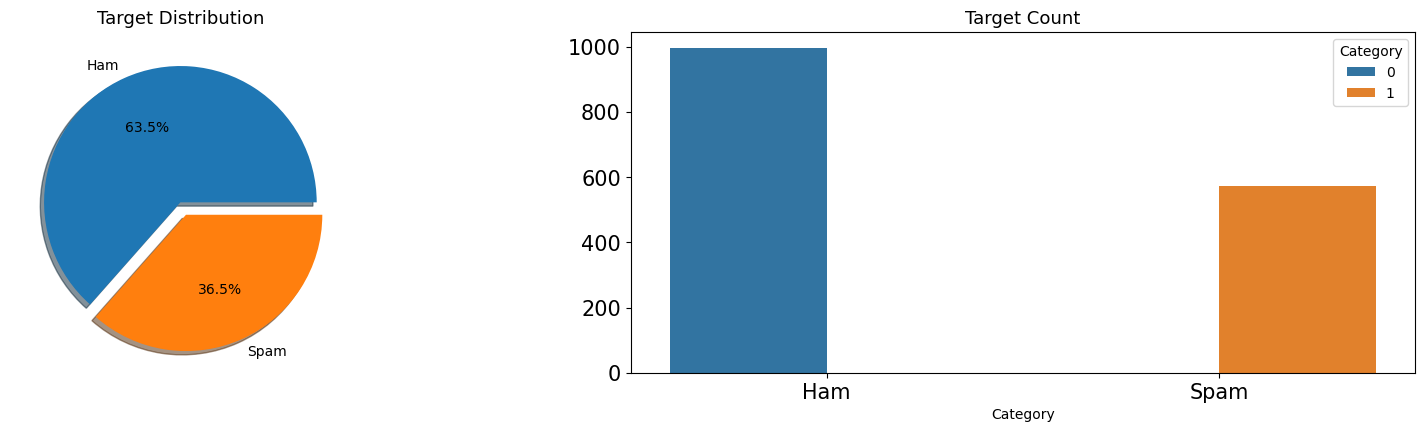

In [80]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

spam_data.groupby('Category')['Message'].count().plot(kind='pie', ax=axes[0], labels=['Ham', 'Spam'], 
                                           shadow=True, explode=[0,0.1], autopct='%1.1f%%')
sns.countplot(x=spam_data['Category'], hue=spam_data['Category'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Ham', 'Spam'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution', fontsize=13)
axes[1].set_title('Target Count', fontsize=13)

plt.show()

In [81]:
#Get features from Columns

In [82]:
spam_data.columns

Index(['Category', 'Message', 'punct_count', 'cl_count', 'nums_count',
       'st_word_count', 'length'],
      dtype='object')

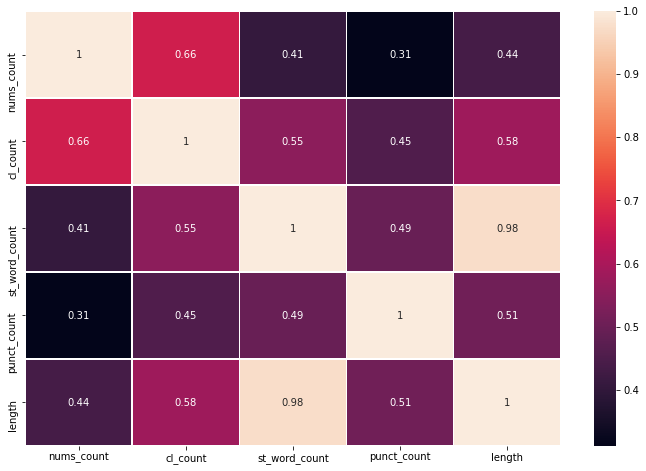

In [83]:
features = list(
    set(spam_data.columns)
    - {
        "Category",
        "Message",
    }
)

plt.figure(figsize=(12, 8))
# Calculate and plot
corr_matrix = spam_data[features].corr()
sns.heatmap(corr_matrix, linewidths=.5, annot=True);

C:\Users\tejes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


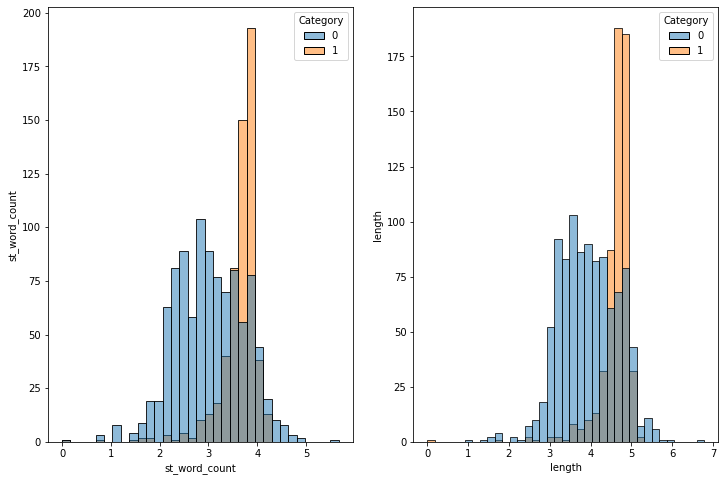

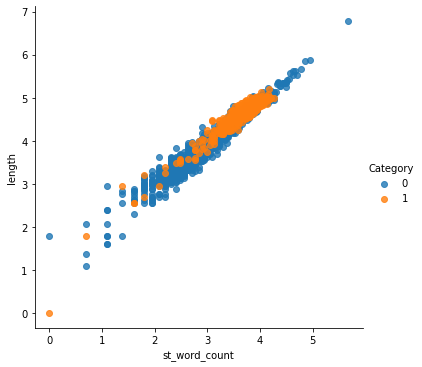

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.histplot(spam_data, ax=axes[0], x="st_word_count", hue = "Category")
axes[0].set_ylabel("st_word_count")
sns.histplot(spam_data, ax=axes[1], x="length", hue = "Category")
axes[1].set_ylabel("length")
sns.lmplot("st_word_count", "length", data=spam_data, hue="Category", fit_reg=False)

In [85]:
spam_data.drop('length',axis = 1, inplace=True)

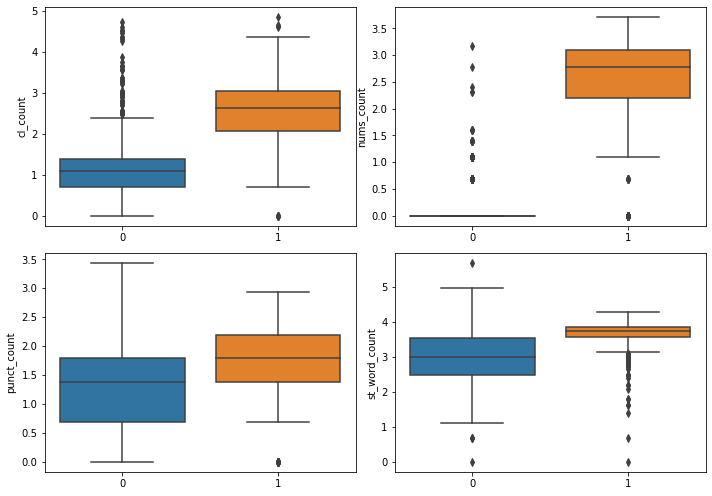

In [86]:
features = list(
    set(spam_data.columns)
    - {
        "Category",
        "Message",
    }
)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
for idx, feat in enumerate(features):
    ax = axes[int(idx / 2), idx % 2]
    sns.boxplot(x="Category", y=feat, data=spam_data, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

In [87]:
spam_data[spam_data["cl_count"] >= 9]["Message"].values

<StringArray>
[]
Length: 0, dtype: string

In [88]:
spam_data.shape

(1569, 6)

In [89]:
from scipy import stats
zf = pd.DataFrame(np.abs(stats.zscore(spam_data[features])), columns= features)
zf.head(5)

,cl_count,nums_count,punct_count,st_word_count
0,0.767846,1.758359,0.723261,0.714319
1,0.435387,0.481633,1.092437,0.679049
2,0.942247,1.555184,0.723261,0.748759
3,1.091641,1.278973,0.521401,1.054794
4,1.281981,1.663416,1.092437,0.679049


In [90]:
z_out = zf[(zf < 3).all(axis=1)]

In [91]:
z_out.shape

(1547, 4)

In [92]:
spam_data = spam_data[(np.abs(stats.zscore(spam_data[features])) < 3).all(axis=1)]

In [93]:
spam_data.shape

(1547, 6)

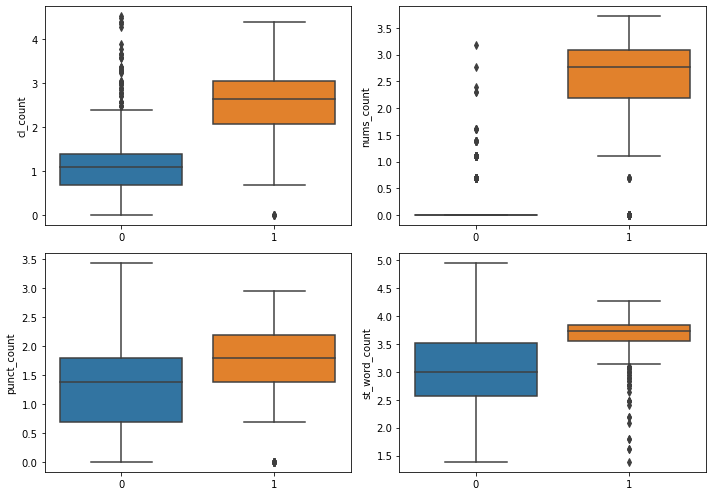

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
for idx, feat in enumerate(features):
    ax = axes[int(idx / 2), idx % 2]
    sns.boxplot(x="Category", y=feat, data=spam_data, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

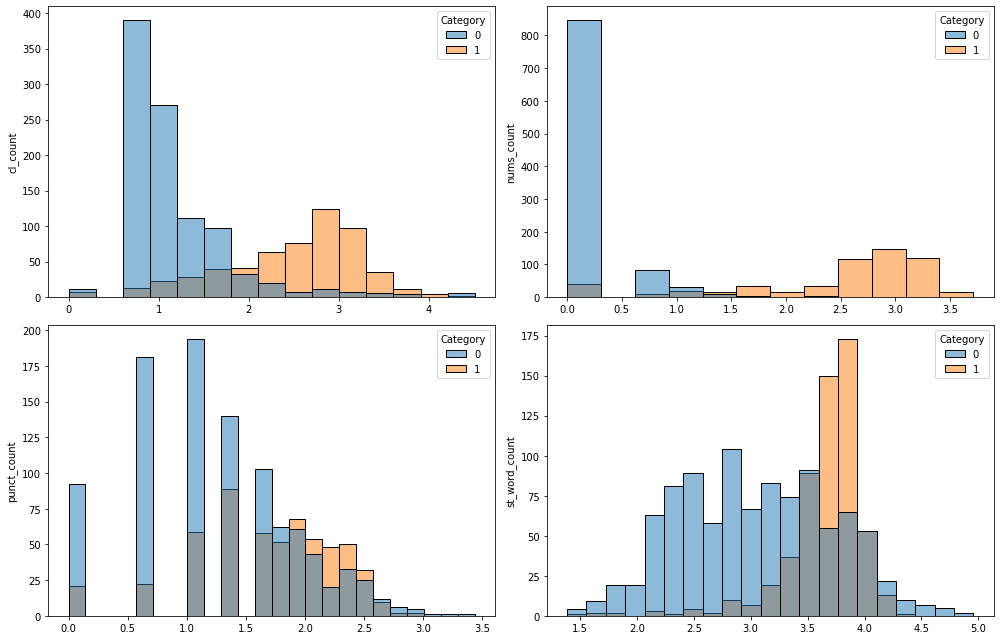

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))
for idx, feat in enumerate(features):
    ax = axes[int(idx / 2), idx % 2]
    sns.histplot(spam_data, ax=ax, x=feat, hue = "Category")
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

<AxesSubplot:xlabel='Category', ylabel='cl_count'>

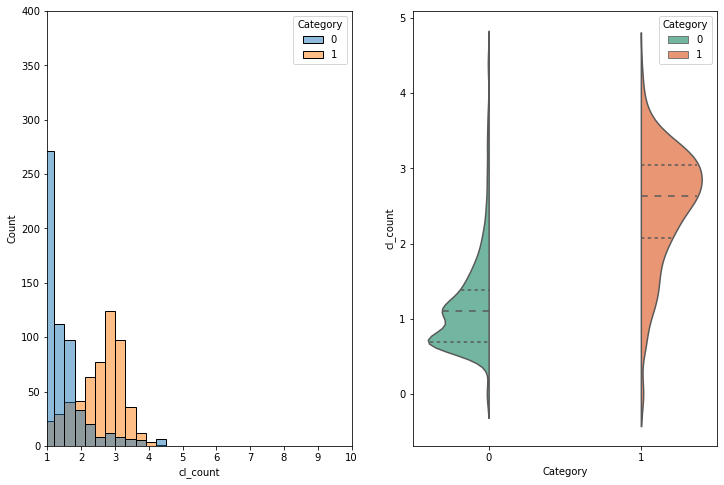

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes[0].set_xlim([1,10])
axes[0].set_ylim([0,400])
sns.histplot(spam_data, ax=axes[0], x="cl_count", hue = "Category")
sns.violinplot(x="Category", y="cl_count", hue="Category",
               data=spam_data, palette="Set2", split=True,
               scale="count", inner="quartile", ax=axes[1])

In [97]:
#mode of our feature
spam_data['cl_count'].mode()

0    0.693147
dtype: float64

In [98]:
values = spam_data[spam_data["cl_count"] == spam_data['cl_count'].mode()[0]].groupby('Category')["cl_count"].count()
values

Category
0    390
1     13
Name: cl_count, dtype: int64

Text(0.5, 1.0, 'Others by target')

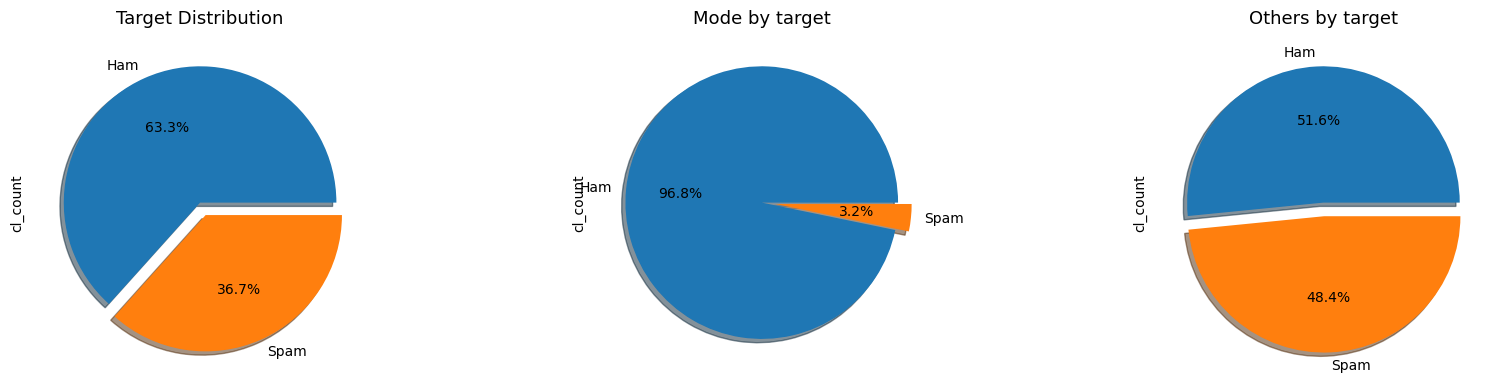

In [99]:
fig, axes = plt.subplots(ncols=3, figsize=(17, 4), dpi=100)
plt.tight_layout()

spam_data.groupby('Category')['cl_count'].count().plot(kind='pie', ax=axes[0], labels=['Ham', 'Spam'], 
                                           shadow=True, explode=[0,0.1], autopct='%1.1f%%')

spam_data[spam_data["cl_count"] == spam_data['cl_count'].mode()[0]].groupby('Category')["cl_count"].count().plot(kind='pie', 
                                                                    ax=axes[1], labels=['Ham', 'Spam'], 
                                                                    shadow=True, explode=[0,0.1], autopct='%1.1f%%')

spam_data[spam_data["cl_count"] != spam_data['cl_count'].mode()[0]].groupby('Category')["cl_count"].count().plot(kind='pie', 
                                                                    ax=axes[2], labels=['Ham', 'Spam'], 
                                                                    shadow=True, explode=[0,0.1], autopct='%1.1f%%')
    
axes[0].set_title('Target Distribution', fontsize=13)
axes[1].set_title('Mode by target', fontsize=13)
axes[2].set_title('Others by target', fontsize=13)

Text(0.5, 1.0, 'Others by target')

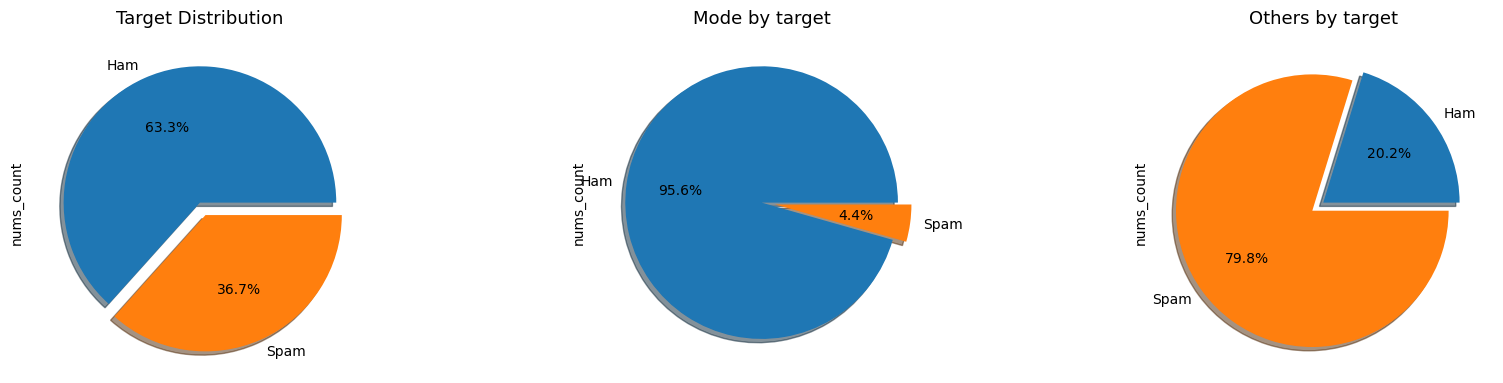

In [100]:
fig, axes = plt.subplots(ncols=3, figsize=(17, 4), dpi=100)
plt.tight_layout()

spam_data.groupby('Category')['nums_count'].count().plot(kind='pie', ax=axes[0], labels=['Ham', 'Spam'], 
                                           shadow=True, explode=[0,0.1], autopct='%1.1f%%')

spam_data[spam_data["nums_count"] == spam_data['nums_count'].mode()[0]].groupby('Category')["nums_count"].count().plot(kind='pie', 
                                                                    ax=axes[1], labels=['Ham', 'Spam'], 
                                                                    shadow=True, explode=[0,0.1], autopct='%1.1f%%')

spam_data[spam_data["nums_count"] != spam_data['nums_count'].mode()[0]].groupby('Category')["nums_count"].count().plot(kind='pie', 
                                                                    ax=axes[2], labels=['Ham', 'Spam'], 
                                                                    shadow=True, explode=[0,0.1], autopct='%1.1f%%')
    
axes[0].set_title('Target Distribution', fontsize=13)
axes[1].set_title('Mode by target', fontsize=13)
axes[2].set_title('Others by target', fontsize=13)

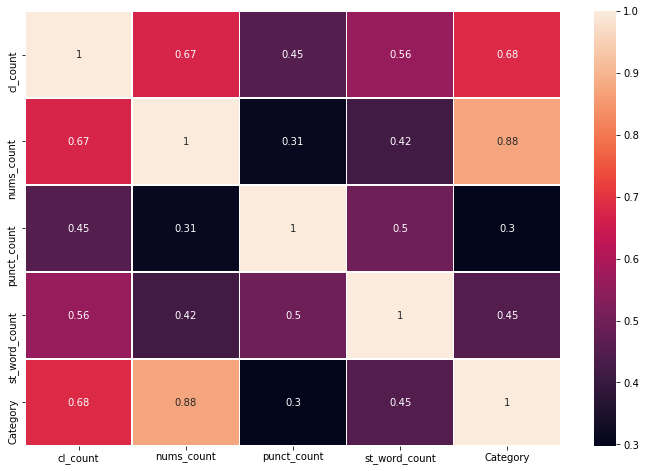

In [101]:
features.append("Category")

plt.figure(figsize=(12, 8))
# Calculate and plot
corr_matrix = spam_data[features].corr()
sns.heatmap(corr_matrix, linewidths=.5, annot=True);

In [102]:
test_text = spam_data["Message"].values[0:2]
test_text

<StringArray>
['free entry in wkly comp to win fa cup final tkts may text fa to to receive entry question std txt rate apply', 'freemsg hey there darling it been week now and no word back like some fun you up for it still tb ok xxx std chgs to send to rcv']
Length: 2, dtype: string

In [103]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
x_tokenized = [nltk.word_tokenize(text) for text in test_text]
x_tokenized

[['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'been',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv']]

In [105]:
def tokenize_and_clean_stopwords(email):

    email_tokens = [nltk.word_tokenize(text) for text in email]
    
    email_tokens_no_stopwords = \
        [[word for word in text if word not in stopwords] for text in email_tokens]
        
    return email_tokens_no_stopwords

In [106]:
test_tokens = tokenize_and_clean_stopwords(test_text)

In [107]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [108]:
def tokenize_and_lemma(email):

    email_tokens = [nltk.word_tokenize(text) for text in email]
    
    email_tokens_no_stopwords = \
        [[word for word in text if word not in stopwords] for text in email_tokens]
        
    email_lemm = [[lemma.lemmatize(word) for word in text] for text in email_tokens_no_stopwords]
    
    return email_tokens_no_stopwords

In [109]:
text_lemm = tokenize_and_lemma(test_text)
text_lemm

[['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv']]

In [110]:
data_ham = spam_data[spam_data["Category"] == 0]["Message"].to_list()
data_spam = spam_data[spam_data["Category"] == 1]["Message"].to_list()

In [111]:
words_ham = tokenize_and_lemma(data_ham)
words_spam = tokenize_and_lemma(data_spam)

In [112]:
spam_data["Category"].value_counts()

0    980
1    567
Name: Category, dtype: int64

In [113]:
list_ham_words = []
for sublist in words_ham:
    for item in sublist:
        list_ham_words.append(item)

In [114]:
list_spam_words = []
for sublist in words_spam:
    for item in sublist:
        list_spam_words.append(item)

In [115]:
fdist_ham  = nltk.FreqDist(list_ham_words)
fdist_spam = nltk.FreqDist(list_spam_words)

In [116]:
df_hamwords_top30_nltk  = pd.DataFrame(fdist_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30_nltk = pd.DataFrame(fdist_spam.most_common(30), columns=['word', 'count'])

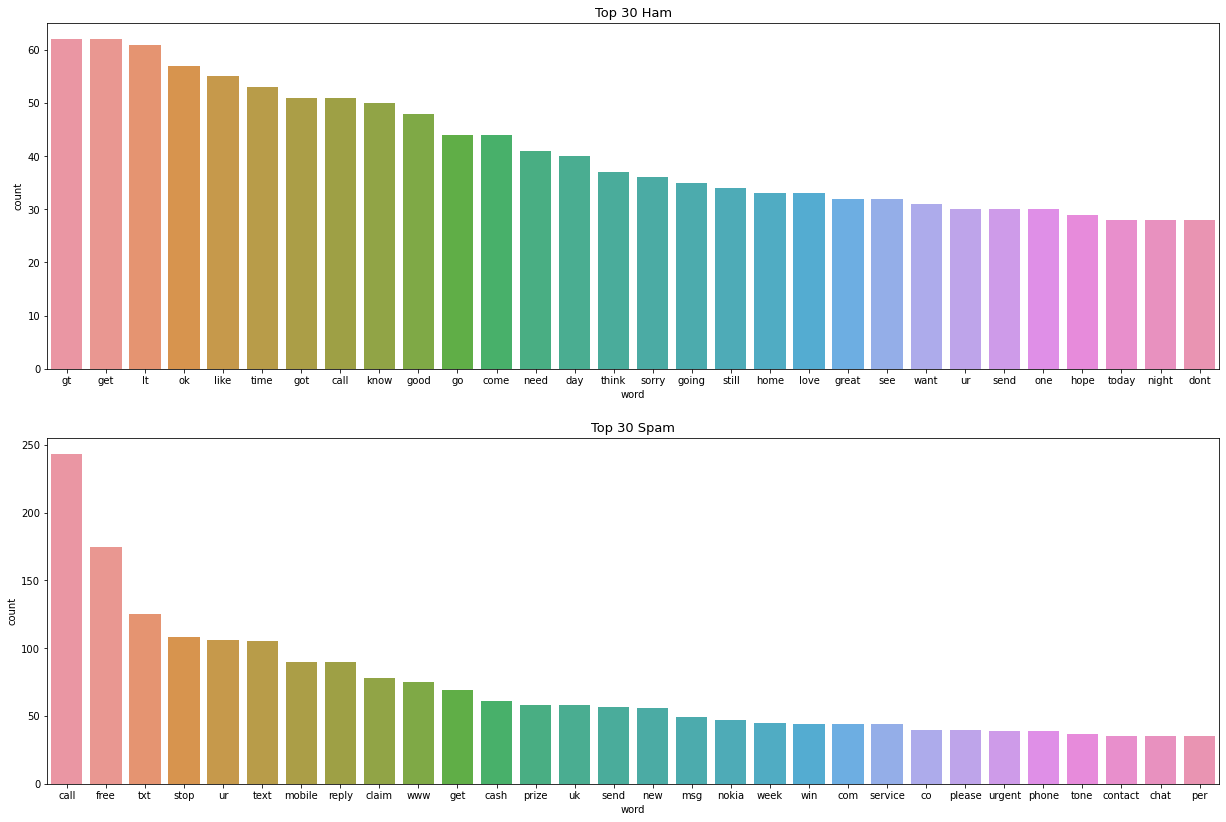

In [117]:
fig, axes = plt.subplots(nrows=2, figsize=(21, 14))
#plt.tight_layout()

sns.barplot(x='word', y='count', 
            data=df_hamwords_top30_nltk, ax=axes[0]);

sns.barplot(x='word', y='count', 
            data=df_spamwords_top30_nltk, ax=axes[1]);

axes[0].set_title('Top 30 Ham', fontsize=13)
axes[1].set_title('Top 30 Spam', fontsize=13)

plt.show()

In [118]:
text_to_bow = tokenize_and_lemma(spam_data['Message'].to_list())

In [119]:
del list_ham_words, list_spam_words, df_hamwords_top30_nltk, df_spamwords_top30_nltk

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=70000)
data_bow = vectorizer.fit_transform([" ".join(text) for text in text_to_bow]).toarray()

In [121]:
data_bow.shape

(1547, 3760)

In [122]:
df_bow = pd.DataFrame(data_bow,
                   columns=vectorizer.get_feature_names())
df_bow.head(5)

,aaooooright,aathi,ab,aberdeen,ability,abiola,able,abnormally,abroad,abt,...,yr,yrs,yummy,yun,yup,zaher,zebra,zed,zoe,zouk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(data_bow)

In [124]:
data_tfidf = tfidf_transformer.transform(data_bow)

In [125]:
data_tfidf

<1547x3760 sparse matrix of type '<class 'numpy.float64'>'
	with 14370 stored elements in Compressed Sparse Row format>

In [126]:
del data_bow

In [127]:
np.shape(data_tfidf)

(1547, 3760)

In [128]:
def num_to_word(ix):
    return df_bow.columns[ix]

In [129]:
c = data_tfidf.tocoo()                                                                                        

tfidf_df = pd.DataFrame({'num_document': c.row, 'word': c.col, 'weight': c.data})
tfidf_df["word"] = tfidf_df["word"].apply(num_to_word)
tfidf_df.head(5)

,num_document,word,weight
0,0,wkly,0.214132
1,0,win,0.160049
2,0,txt,0.125773
3,0,tkts,0.256800
4,0,text,0.130464


In [130]:
def top_n_sort(s, num, col):
    tmp = s.sort_values(by = [col], ascending=False)[:num]  
    tmp.index = range(num)
    return tmp

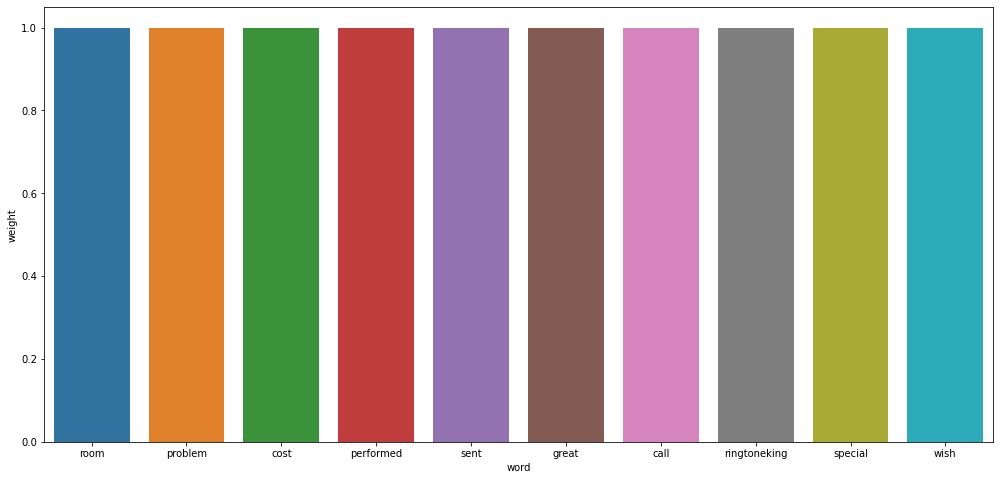

In [131]:
fig, axes = plt.subplots(figsize=(17, 8))

sns.barplot(x='word', y='weight', 
            data= top_n_sort(tfidf_df, 10, 'weight'), ax=axes);

In [132]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, spam_data["Category"], test_size=0.3, random_state=5)

In [133]:
data_tfidf_train

<1082x3760 sparse matrix of type '<class 'numpy.float64'>'
	with 10253 stored elements in Compressed Sparse Row format>

In [134]:
data_tfidf_test

<465x3760 sparse matrix of type '<class 'numpy.float64'>'
	with 4117 stored elements in Compressed Sparse Row format>

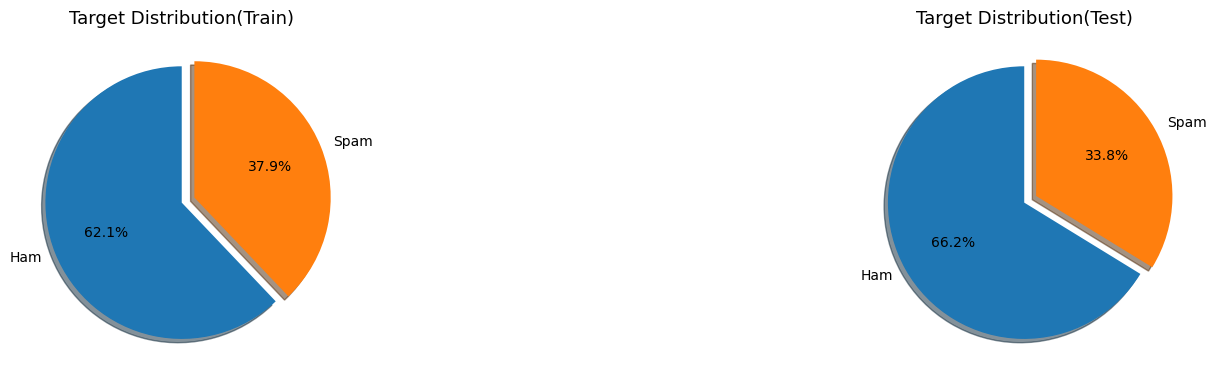

In [135]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

axes[0].pie(label_train.value_counts(), explode=(0, 0.1), labels=["Ham","Spam"], autopct='%1.1f%%',
        shadow=True, startangle=90)

axes[1].pie(label_test.value_counts(), explode=(0, 0.1), labels=["Ham","Spam"], autopct='%1.1f%%',
        shadow=True, startangle=90)

axes[0].set_title('Target Distribution(Train)', fontsize=13)
axes[1].set_title('Target Distribution(Test)', fontsize=13)

plt.show()

In [136]:
spam_data.columns

Index(['Category', 'Message', 'punct_count', 'cl_count', 'nums_count',
       'st_word_count'],
      dtype='object')

In [137]:
features = list(
    set(spam_data.columns)
    - {
        "Category",
        "Message",
    }
)

In [138]:
np.shape(data_tfidf)

(1547, 3760)

In [139]:
from scipy.sparse import  hstack
X = hstack((data_tfidf ,np.array(spam_data['punct_count'])[:,None]))

In [140]:
np.shape(X)

(1547, 3761)

In [141]:
X2 = hstack((X ,np.array(spam_data['cl_count'])[:,None]))

In [142]:
del X
np.shape(X2)

(1547, 3762)

In [143]:
X3 = hstack((X2 ,np.array(spam_data['nums_count'])[:,None]))

In [144]:
del X2
np.shape(X3)

(1547, 3763)

In [145]:
X4 = hstack((X3 ,np.array(spam_data['st_word_count'])[:,None])).A

In [146]:
del X3
np.shape(X4)

(1547, 3764)

In [147]:
X4_train, X4_test, y4_train, y4_test = \
    train_test_split(X4, spam_data["Category"], test_size=0.3, random_state=5)

In [148]:
from sklearn.naive_bayes import MultinomialNB

In [149]:
mnb_with_feat_unsc = MultinomialNB().fit(X4_train, y4_train.values.ravel())
pred_mwfu = mnb_with_feat_unsc.predict(X4_test)

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
X4_tfidf_train = X4_train[:,0:70000]
X4_tfidf_test  = X4_test[:,0:70000]
X4_feat_train = X4_train[:,-4:70004]
X4_feat_test  = X4_test[:,-4:70004]

In [152]:
scaler = MinMaxScaler()
X4_tfidf_train = scaler.fit_transform(X4_tfidf_train)
X4_tfidf_test  = scaler.transform(X4_tfidf_test)

In [153]:
scaler = MinMaxScaler()
X4_feat_train = scaler.fit_transform(X4_feat_train)
X4_feat_test  = scaler.transform(X4_feat_test)

In [154]:
X4_train = np.hstack((X4_tfidf_train, X4_feat_train))
X4_test  = np.hstack((X4_tfidf_test,  X4_feat_test))

In [155]:
mnb_with_feat_sc = MultinomialNB().fit(X4_train, y4_train.values.ravel())
pred_mwfs = mnb_with_feat_sc.predict(X4_test)

In [156]:
del X4_tfidf_train, X4_tfidf_test, X4_feat_train, X4_feat_test

In [157]:
data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

In [158]:
mnb_without_feat_unsc = MultinomialNB().fit(data_tfidf_train, label_train.values.ravel())
pred_mwtfus = mnb_without_feat_unsc.predict(data_tfidf_test)

In [159]:
del X4_train

In [160]:
scaler = MinMaxScaler()
data_tfidf_train = scaler.fit_transform(data_tfidf_train)
data_tfidf_test  = scaler.transform(data_tfidf_test)

In [161]:
mnb_without_feat_sc = MultinomialNB().fit(data_tfidf_train, label_train.values.ravel())
pred_mwtfs = mnb_without_feat_sc.predict(data_tfidf_test)

In [162]:
from sklearn.metrics import confusion_matrix

In [163]:
conf_mwfu = confusion_matrix(pred_mwfu,y4_test)
conf_mwfs = confusion_matrix(pred_mwfs,y4_test)
conf_mwtfus = confusion_matrix(pred_mwtfus,label_test)
conf_mwtfs = confusion_matrix(pred_mwtfs,label_test)

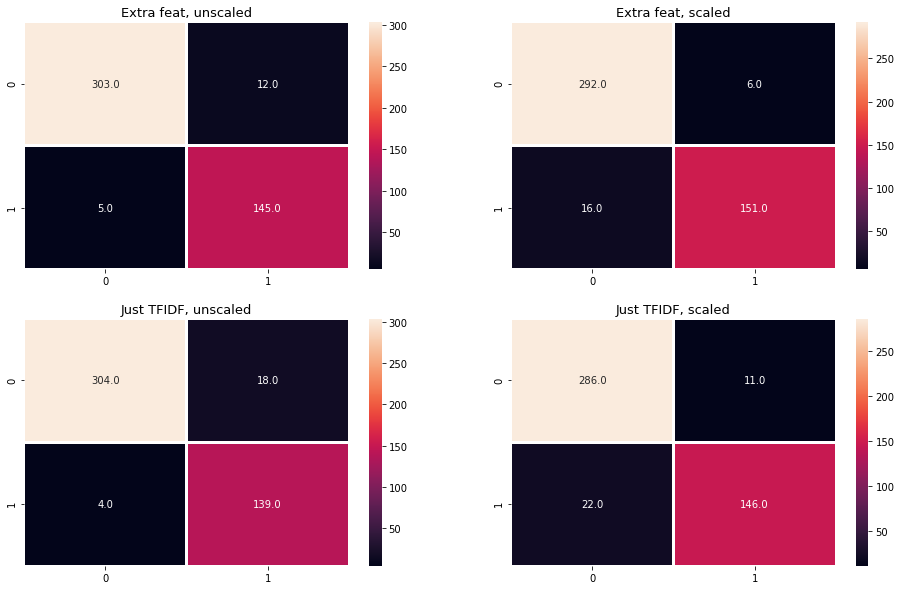

In [164]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
#plt.tight_layout()
sns.heatmap(conf_mwfu,annot=True,fmt=".1f",linewidths=1.5, ax=axes[0][0])
sns.heatmap(conf_mwfs,annot=True,fmt=".1f",linewidths=1.5, ax=axes[0][1])
sns.heatmap(conf_mwtfus,annot=True,fmt=".1f",linewidths=1.5, ax=axes[1][0])
sns.heatmap(conf_mwtfs,annot=True,fmt=".1f",linewidths=1.5, ax=axes[1][1])

axes[0][0].set_title('Extra feat, unscaled', fontsize=13)
axes[0][1].set_title('Extra feat, scaled', fontsize=13)
axes[1][0].set_title('Just TFIDF, unscaled', fontsize=13)
axes[1][1].set_title('Just TFIDF, scaled', fontsize=13)

plt.show()

In [165]:
from sklearn.metrics import accuracy_score

In [166]:
dr1 = {'m_name': ["unscaled", "scaled"], 
       'acc': [accuracy_score(y4_test, pred_mwfu), accuracy_score(y4_test, pred_mwfs)]}
df_wf_res = pd.DataFrame(data=dr1)

In [167]:
dr2 = {'m_name': ["unscaled", "scaled"], 
       'acc': [accuracy_score(label_test, pred_mwtfus), accuracy_score(label_test, pred_mwtfs)]}
df_wtf_res = pd.DataFrame(data=dr2)

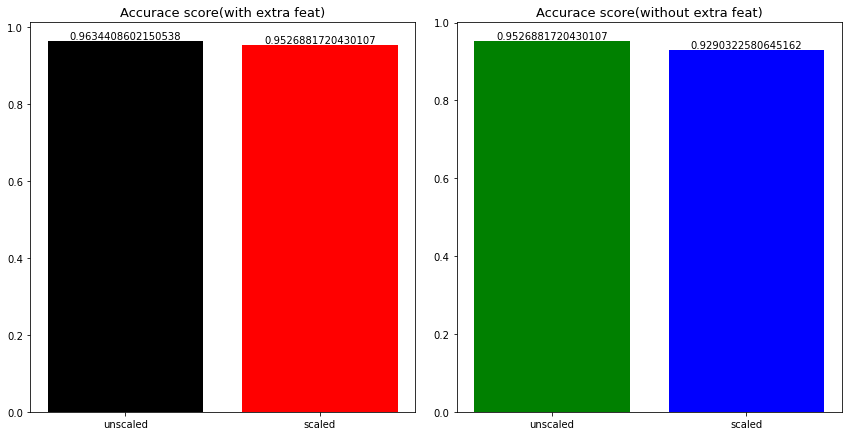

In [168]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
plt.tight_layout()

axes[0].bar(df_wf_res['m_name'],df_wf_res['acc'], color=['black', 'red'])
axes[1].bar(df_wtf_res['m_name'],df_wtf_res['acc'], color=['green', 'blue'])

for i in range(2):
    axes[0].annotate(str(df_wf_res['acc'][i]), xy=(df_wf_res['m_name'][i],df_wf_res['acc'][i]), 
                                                                   ha='center', va='bottom')
for i in range(2):
    axes[1].annotate(str(df_wtf_res['acc'][i]), xy=(df_wtf_res['m_name'][i],df_wtf_res['acc'][i]), 
                                                                   ha='center', va='bottom')

axes[0].set_title('Accurace score(with extra feat)', fontsize=13)
axes[1].set_title('Accurace score(without extra feat)', fontsize=13)    
plt.show()

In [169]:
from sklearn.metrics import recall_score

In [170]:
dr1 = {'m_name': ["unscaled", "scaled"], 
       'rec': [recall_score(y4_test, pred_mwfu), recall_score(y4_test, pred_mwfs)]}
df_wf_res = pd.DataFrame(data=dr1)

In [171]:
dr2 = {'m_name': ["unscaled", "scaled"], 
       'rec': [recall_score(label_test, pred_mwtfus), recall_score(label_test, pred_mwtfs)]}
df_wtf_res = pd.DataFrame(data=dr2)

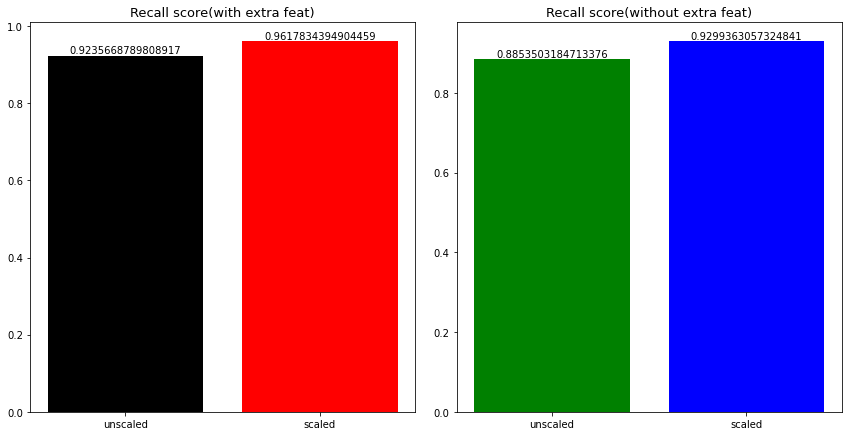

In [172]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
plt.tight_layout()

axes[0].bar(df_wf_res['m_name'],df_wf_res['rec'], color=['black', 'red'])
axes[1].bar(df_wtf_res['m_name'],df_wtf_res['rec'], color=['green', 'blue'])

for i in range(2):
    axes[0].annotate(str(df_wf_res['rec'][i]), xy=(df_wf_res['m_name'][i],df_wf_res['rec'][i]), 
                                                                   ha='center', va='bottom')
for i in range(2):
    axes[1].annotate(str(df_wtf_res['rec'][i]), xy=(df_wtf_res['m_name'][i],df_wtf_res['rec'][i]), 
                                                                   ha='center', va='bottom')

axes[0].set_title('Recall score(with extra feat)', fontsize=13)
axes[1].set_title('Recall score(without extra feat)', fontsize=13)    
plt.show()

In [173]:
from sklearn.metrics import precision_score

In [174]:
dr1 = {'m_name': ["unscaled", "scaled"], 
       'prec': [precision_score(y4_test, pred_mwfu), precision_score(y4_test, pred_mwfs)]}
df_wf_res = pd.DataFrame(data=dr1)

In [175]:
dr2 = {'m_name': ["unscaled", "scaled"], 
       'prec': [precision_score(label_test, pred_mwtfus), precision_score(label_test, pred_mwtfs)]}
df_wtf_res = pd.DataFrame(data=dr2)

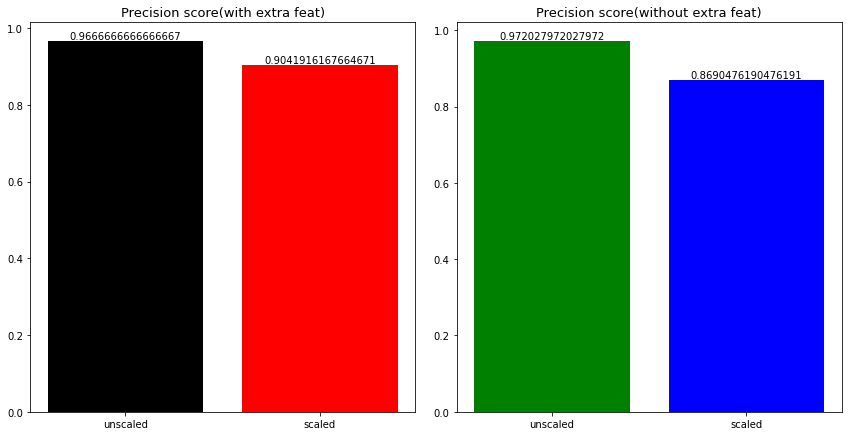

In [176]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
plt.tight_layout()

axes[0].bar(df_wf_res['m_name'],df_wf_res['prec'], color=['black', 'red'])
axes[1].bar(df_wtf_res['m_name'],df_wtf_res['prec'], color=['green', 'blue'])

for i in range(2):
    axes[0].annotate(str(df_wf_res['prec'][i]), xy=(df_wf_res['m_name'][i],df_wf_res['prec'][i]), 
                                                                   ha='center', va='bottom')
for i in range(2):
    axes[1].annotate(str(df_wtf_res['prec'][i]), xy=(df_wtf_res['m_name'][i],df_wtf_res['prec'][i]), 
                                                                   ha='center', va='bottom')

axes[0].set_title('Precision score(with extra feat)', fontsize=13)
axes[1].set_title('Precision score(without extra feat)', fontsize=13)    
plt.show()

In [181]:
from sklearn.metrics import roc_auc_score

In [182]:
dr1 = {'m_name': ["unscaled", "scaled"], 
       'auc_score': [roc_auc_score(y4_test, pred_mwfu), roc_auc_score(y4_test, pred_mwfs)]}
df_wf_res = pd.DataFrame(data=dr1)

In [183]:
dr2 = {'m_name': ["unscaled", "scaled"], 
       'auc_score': [roc_auc_score(label_test, pred_mwtfus), roc_auc_score(label_test, pred_mwtfs)]}
df_wtf_res = pd.DataFrame(data=dr2)

In [184]:
from sklearn.metrics import roc_curve

In [185]:
fpr_mwfu, tpr_mwfu, thresholds_mwfu = roc_curve(y4_test, pred_mwfu)
fpr_mwfs, tpr_mwfs, thresholds_mwfs = roc_curve(y4_test, pred_mwfs)
fpr_mwtfus, tpr_mwtfus, thresholds_mwtfus = roc_curve(label_test, pred_mwtfus)
fpr_mwtfs, tpr_mwtfs, thresholds_mwtfs = roc_curve(label_test, pred_mwtfs)

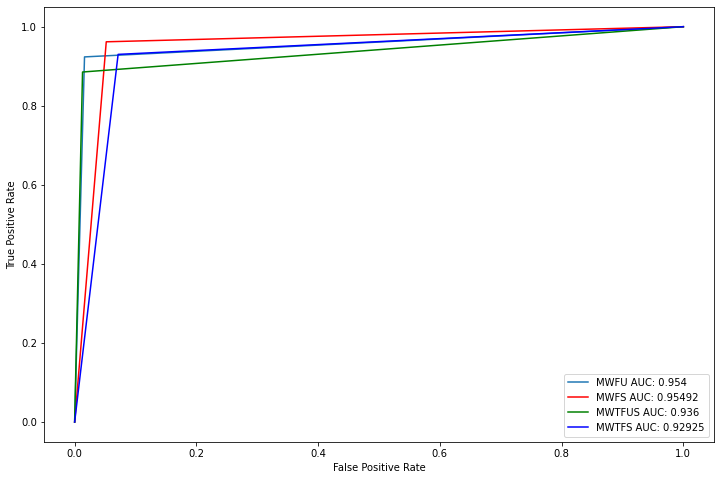

In [186]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.plot(fpr_mwfu, tpr_mwfu, label = 'MWFU AUC: %.3f'%dr1['auc_score'][0])
axes.plot(fpr_mwfs,tpr_mwfs,'r-', label= 'MWFS AUC: %.5f'%dr1['auc_score'][1])
axes.plot(fpr_mwtfus,tpr_mwtfus,'g-', label= 'MWTFUS AUC: %.3f'%dr2['auc_score'][0])
axes.plot(fpr_mwtfs,tpr_mwtfs,'b-', label= 'MWTFS AUC: %.5f'%dr2['auc_score'][1])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()